<a href="https://colab.research.google.com/github/Patel-Aman/data_science_basics/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score,f1_score
import graphviz
from sklearn import tree

In [ ]:
df = pd.read_csv('drugs.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
df.loc[:, df.isnull().any()].columns      #no missing values

Index([], dtype='object')

In [ ]:
orcode = OrdinalEncoder()
df.Sex = orcode.fit_transform(df[["Sex"]])
df.BP = orcode.fit_transform(df[["BP"]])
df.Cholesterol = orcode.fit_transform(df[["Cholesterol"]])

X = df.drop(['Drug'], axis=1)     #features

In [ ]:
df.Drug = orcode.fit_transform(df[["Drug"]])
y = df.Drug       #Target

In [ ]:
np.random.seed(55)

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=592)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=425)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.1, random_state=358)

In [ ]:
modelE = DTC(criterion='entropy',random_state=785)
modelE.fit(X_train2, y_train2)

modelG1 = DTC(criterion='gini',random_state=384)
modelG1.fit(X_train1, y_train1)

modelG2 = DTC(criterion='gini',random_state=852)
modelG2.fit(X_train3, y_train3)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=852, splitter='best')

In [ ]:
pred_train_y1 = modelG1.predict(X_train1)
print('Model 1 Accuracy | ',accuracy_score(pred_train_y1,y_train1))

pred_train_y2 = modelE.predict(X_train2)
print('Model 2 Accuracy | ',accuracy_score(pred_train_y2,y_train2))

pred_train_y3 = modelG2.predict(X_train3)
print('Model 3 Accuracy | ',accuracy_score(pred_train_y3,y_train3))

pred_y1 = modelG1.predict(X_test1)
# Test Accuracy
print('Test Accuracy of model 1 | ',accuracy_score(y_test1,pred_y1))

pred_y2 = modelE.predict(X_test2)
print('Test Accuracy of model 2 | ',accuracy_score(y_test2,pred_y2))

pred_y3 = modelG2.predict(X_test3)
print('Test Accuracy of model 3 | ',accuracy_score(y_test3,pred_y3))

Model 1 Accuracy |  1.0
Model 2 Accuracy |  1.0
Model 3 Accuracy |  1.0
Test Accuracy of model 1 |  1.0
Test Accuracy of model 2 |  0.975
Test Accuracy of model 3 |  1.0


In [ ]:
# Confusion Matrix
pred_y1 = modelG1.predict(X_test1)
conf_mat1 = confusion_matrix(y_test1,pred_y1)
print('Confusion Matrix of 1st model:')
print(conf_mat1)

pred_y2 = modelE.predict(X_test2)
conf_mat2 = confusion_matrix(y_test2,pred_y2)
print('Confusion Matrix of 2nd model:')
print(conf_mat2)

pred_y3 = modelG2.predict(X_test3)
conf_mat3 = confusion_matrix(y_test3,pred_y3)
print('Confusion Matrix of 3rd model:')
print(conf_mat3)

Confusion Matrix of 1st model:
[[26  0  0  0  0]
 [ 0 10  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 16]]
Confusion Matrix of 2nd model:
[[18  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  1  5  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0 10]]
Confusion Matrix of 3rd model:
[[9 0 0 0 0]
 [0 3 0 0 0]
 [0 0 2 0 0]
 [0 0 0 3 0]
 [0 0 0 0 3]]


In [ ]:
print('Model 1')
print('Accuracy | ',accuracy_score(y_test1,pred_y1))
print('Precision | ',precision_score(y_test1,pred_y1, average='micro'))
print('Recall |' ,recall_score(y_test1,pred_y1, average='micro'))
print('F1-score | ',f1_score(y_test1,pred_y1, average='micro'))

print('\n')
print('model 2')
print('Accuracy | ',accuracy_score(y_test2,pred_y2))
print('Precision | ',precision_score(y_test2,pred_y2, average='micro'))
print('Recall |' ,recall_score(y_test2,pred_y2, average='micro'))
print('F1-score | ',f1_score(y_test2,pred_y2, average='micro'))

print('\n')
print('model 3')
print('Accuracy | ',accuracy_score(y_test3,pred_y3))
print('Precision | ',precision_score(y_test3,pred_y3, average='micro'))
print('Recall |' ,recall_score(y_test3,pred_y3, average='micro'))
print('F1-score | ',f1_score(y_test3,pred_y3, average='micro'))

Model 1
Accuracy |  1.0
Precision |  1.0
Recall | 1.0
F1-score |  1.0


model 2
Accuracy |  0.975
Precision |  0.975
Recall | 0.975
F1-score |  0.975


model 3
Accuracy |  1.0
Precision |  1.0
Recall | 1.0
F1-score |  1.0


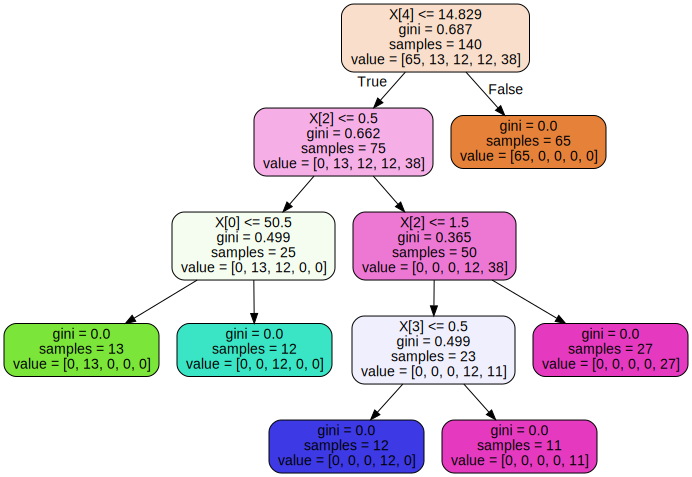

In [ ]:
dot_tree1 = tree.export_graphviz(modelG1,filled=True,rounded=True)
dot_tree2 = tree.export_graphviz(modelE,filled=True,rounded=True)
dot_tree3 = tree.export_graphviz(modelG2,filled=True,rounded=True)
graph = graphviz.Source(dot_tree1, format="png")
graph.render("modelG1")
graph

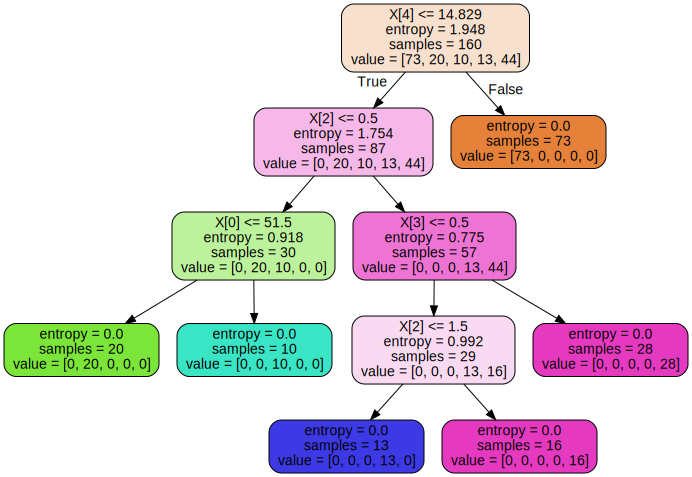

In [ ]:
graph = graphviz.Source(dot_tree2, format="png")
graph.render("modelE")
graph

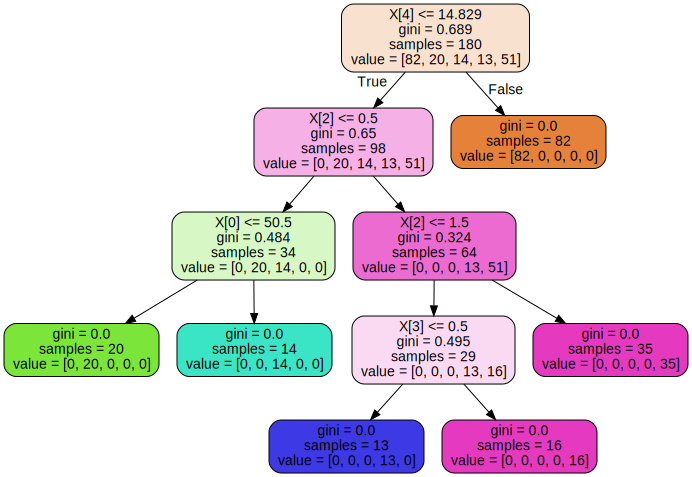

In [ ]:
graph = graphviz.Source(dot_tree3, format="png")
graph.render("modelG2")
graph

# Task 2

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/Concrete_Data.xls - Sheet1.csv')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
X = df.iloc[:,0:8]
y = df.iloc[:,-1]

In [ ]:
np.random.seed(2021)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=648)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(criterion='mae', splitter='random', random_state=27)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=27, splitter='random')

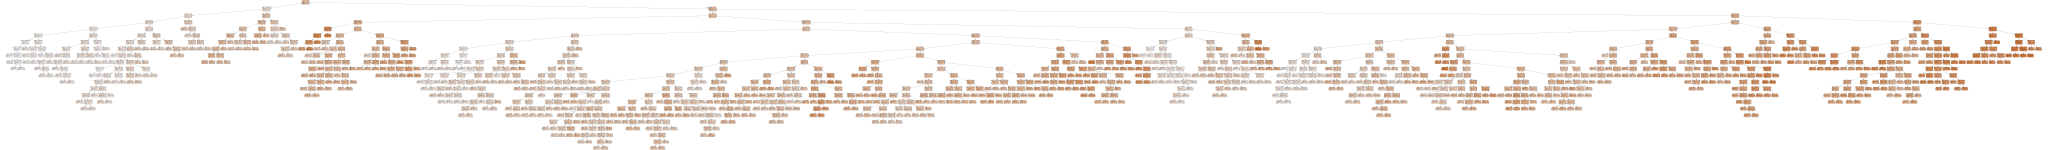

In [ ]:
import graphviz
dot_tree = tree.export_graphviz(regressor,filled=True,rounded=True)
graph = graphviz.Source(dot_tree, format="png")
graph

In [ ]:
y_pre = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
err_mae = mean_absolute_error(y_test, y_pre)
print('mae: ', end='')
print(err_mae)

err_mse = mean_squared_error(y_test, y_pre)
print(f'mse: {err_mse}')

mae: 4.315663430420712
mse: 51.76423737864078
